# Project Group - 

Members: Tieme van Hijum, Emma van den Brink, Sil Havinga

Student numbers: 4923588, 5136008, 4730321

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

Research Question:

 - What is the development over time in The Netherlands when it comes to the share of population outside of the maximum distance to a hospital?

Data Sources: 
 - CBS: Per municipality, district and neighborhood; proximity to hospital and population. https://www.cbs.nl/nl-nl/reeksen/publicatie/nabijheidsstatistieken-per-wijk-buurt
 - Optionally, data for hospital locations over time

Time Scale:
 - Data is available from 2007 until 2022, but the geography has changed over that time.

In [20]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib

In [35]:
Wijken2022 = gpd.read_file('AreaGeodata/Wijken2013.shp')
Wijken2022 = Wijken2022.set_index('statcode')
Wijken2022.head()

,statnaam,geometry
statcode,,
WK000300,Wijk 00,"POLYGON ((251260.531 594393.787, 251427.786 59..."
WK000500,Wijk 00,"POLYGON ((235657.682 595019.47, 235897.8 59438..."
WK000700,Wijk 00 Bellingwolde,"POLYGON ((272254.41 575636.041, 272451.7 57591..."
WK000701,Wijk 01 Oost,"POLYGON ((273917.5 567899.5, 274502.406 568475..."
WK000702,Wijk 02 Blijham,"POLYGON ((269997 566028, 270040.406 565905.375..."


<Axes: >

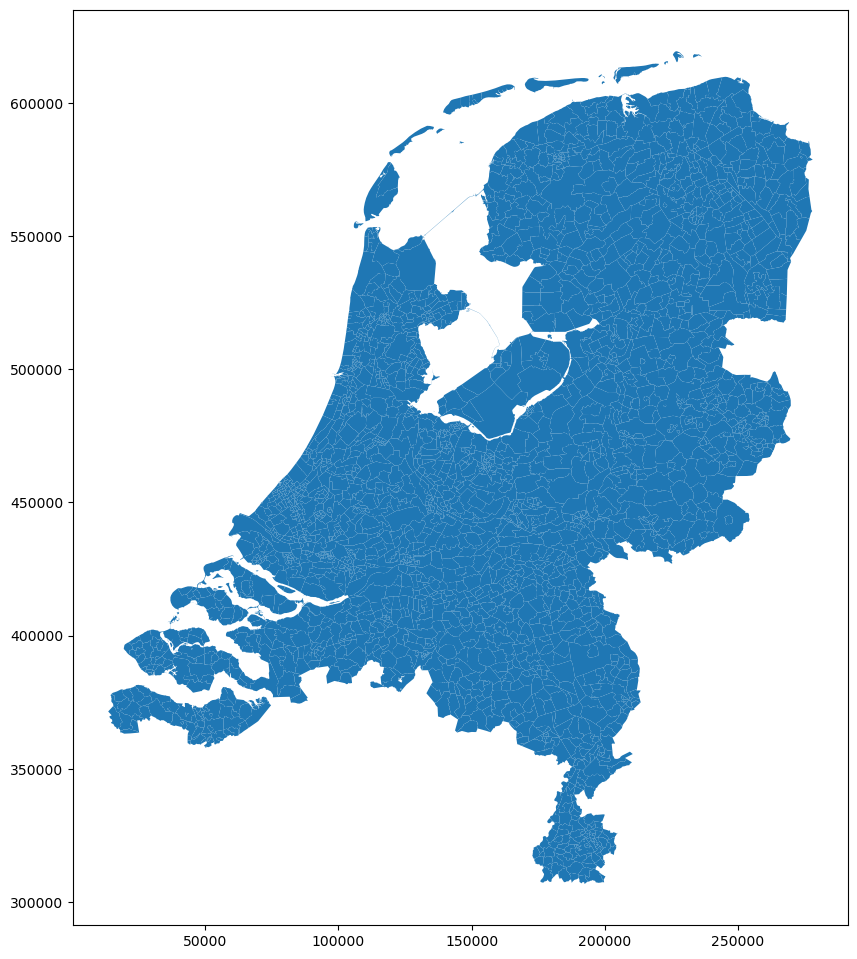

In [36]:
Wijken2022.plot(figsize = (10,30))

In [37]:
Proximities2022 = pd.read_csv('ProximitiesPerArea/Proximities2013.csv', index_col = 'WijkenEnBuurten')
Proximities2022 = Proximities2022.sort_values(by = 'WijkenEnBuurten')
Proximities2022.head()

,ID,AfstandTotZiekenhuis_11
WijkenEnBuurten,,
WK000300,2,3.9
WK000500,10,10.3
WK000700,20,11.8
WK000701,30,13.9
WK000702,35,7.2


In [38]:
Wijken2022['AfstandTotZiekenhuis_11'] = Proximities2022['AfstandTotZiekenhuis_11'].tolist()
#Wijken2022['AfstandTotZiekenhuis_15'] = Proximities2022['AfstandTotZiekenhuis_15'].tolist()

<Axes: >

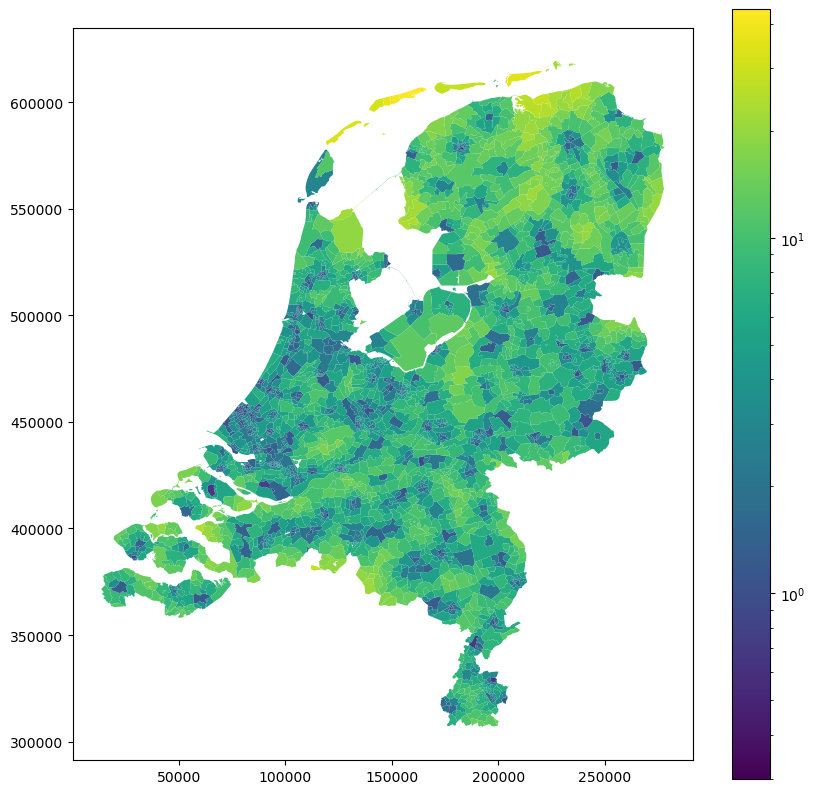

In [39]:
Wijken2022.plot(figsize = (10,10), column='AfstandTotZiekenhuis_11', legend = True, 
                norm=matplotlib.colors.LogNorm(vmin=Wijken2022.AfstandTotZiekenhuis_11.min(), vmax=Wijken2022.AfstandTotZiekenhuis_11.max(), clip = True))

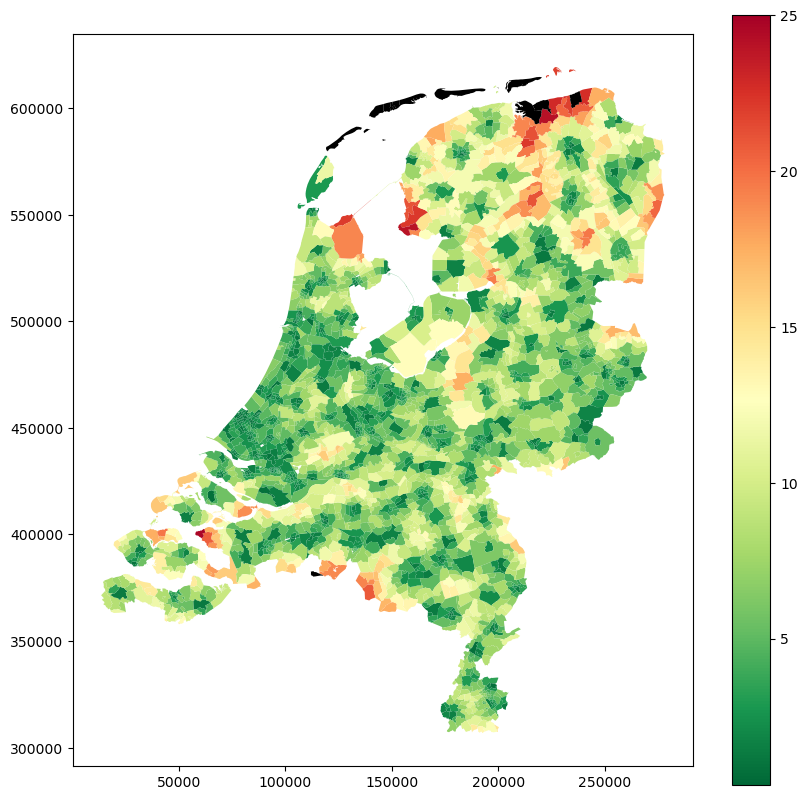

In [40]:
fig, ax = plt.subplots(figsize = (10,10))

Wijken2022[Wijken2022['AfstandTotZiekenhuis_11'] < 25].plot(
    ax=ax, vmax=25, column='AfstandTotZiekenhuis_11', legend=True, cmap='RdYlGn_r')
Wijken2022[Wijken2022['AfstandTotZiekenhuis_11'] >= 25].plot(ax=ax, color='black', legend=True)

plt.show();

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**:

**Author 3**:

# Data Used

# Data Pipeline